In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from datetime import datetime, timedelta
from IPython.display import Image

In [3]:
df = pd.read_csv('https://data.cdc.gov/api/views/u6jv-9ijr/rows.csv?accessType=DOWNLOAD&bom=true&format=true%20target=',
                parse_dates=['Week Ending Date'])
df.head()

/Users/carterpace/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Cause Group,Number of Deaths,Cause Subgroup,Time Period,Suppress,Note,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
0,Alabama,2015-01-10,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
1,Alabama,2016-01-09,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
2,Alabama,2017-01-07,AL,2017,1,Alzheimer disease and dementia,96.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
3,Alabama,2018-01-06,AL,2018,1,Alzheimer disease and dementia,108.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
4,Alabama,2019-01-05,AL,2019,1,Alzheimer disease and dementia,115.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)


In [4]:
df['Week Ending Date'][0]

Timestamp('2015-01-10 00:00:00')

In [5]:
texas = df[df['Jurisdiction']=='Texas']
texas.head()

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Cause Group,Number of Deaths,Cause Subgroup,Time Period,Suppress,Note,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
12131,Texas,2015-01-10,TX,2015,1,Alzheimer disease and dementia,465.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,430,NaN,NaN,Predicted (weighted)
12132,Texas,2016-01-09,TX,2016,1,Alzheimer disease and dementia,407.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,430,NaN,NaN,Predicted (weighted)
12133,Texas,2017-01-07,TX,2017,1,Alzheimer disease and dementia,369.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,430,NaN,NaN,Predicted (weighted)
12134,Texas,2018-01-06,TX,2018,1,Alzheimer disease and dementia,492.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,430,NaN,NaN,Predicted (weighted)
12135,Texas,2019-01-05,TX,2019,1,Alzheimer disease and dementia,416.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,430,NaN,NaN,Predicted (weighted)


In [6]:
now = texas[texas['Year']==2019]
now = now[now['Week']==1]
sum(now['Number of Deaths'])

3282.0

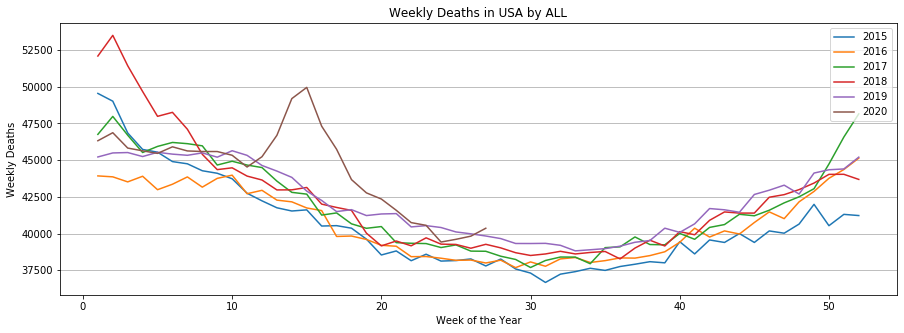

In [23]:
for year in df['Year'].unique():
    df_temp = df[df['Jurisdiction']=='United States']
    df_temp = df_temp[df_temp['Year']==year]
    weeks = []
    values = []
    for week in df_temp['Week'].unique():
        weeks.append(week)
        values.append(sum(df_temp[df_temp['Week']==week]['Number of Deaths']))
    plt.plot(weeks, values, label=year)
    
plt.xlabel('Week of the Year')
plt.ylabel('Weekly Deaths')
plt.title('Weekly Deaths in USA by ALL')
    
fig = plt.gcf()
plt.legend(loc='upper right')
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

In [14]:
def f(state, cause):
    #handle state choice
    df2 = df[df['Jurisdiction']==state]
        
    #handle cause choice
    if(cause != 'ALL'):
        df2 = df2[df2['Cause Subgroup']==cause]
        
    for year in df2['Year'].unique():
        df_temp = df2[df2['Year']==year]
        weeks = []
        values = []
        for week in df_temp['Week'].unique():
            weeks.append(week)
            values.append(sum(df_temp[df_temp['Week']==week]['Number of Deaths']))
        plt.plot(weeks, values, label=year)

    plt.xlabel('Week of the Year')
    plt.ylabel('Weekly Deaths')
    plt.title('Weekly Deaths in '+str(state)+' by '+str(cause))

    fig = plt.gcf()
    plt.legend(loc='upper right')
    fig.set_size_inches(15,5)
    plt.grid(axis='y')
    plt.show()

state_list = df['Jurisdiction'].unique()
state_list = np.delete(state_list, 46)
state_list = np.append('United States', state_list)
# state_list[46]

cause_list = df['Cause Subgroup'].unique()
cause_list = np.append('ALL', cause_list)

state_w = widgets.Dropdown(options=state_list, value='Texas')
cause_w = widgets.Dropdown(options=cause_list, value='ALL')

widget = interact(f, state=state_w, cause=cause_w)
widget

interactive(children=(Dropdown(description='state', index=46, options=('United States', 'Alabama', 'Alaska', '…

<function __main__.f(state, cause)>